# Melanoma

1. Can you show and visualize the correlations and concepts between the different datasets?
2. As melanoma is a set of diverse diseases, can you stratify the patients based on all the data in to subgroups?
3.  Can you integrate all the data to make more accurate predictions for each patient than you would by only looking at one data source?
4. Can you select a list of most informational variables that drive the predictions?
5. Can you select a list of most informational variables distinctive for each patient subgroup?
6. Can you identify a signature based on an integrative approach that can predict response to immunotherapy?
7. Can you identify a signature that correlates with the prognosis of immunotherapy?




In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

pd.options.display.max_rows = 10
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.1f}'.format

In [0]:
def read_table(name):
    file_root = "https://storage.googleapis.com/genx_2018/"
    return pd.read_table(file_root + name, sep="\t")

In [0]:
phenotype_meta_table = read_table("Melanoma_Phenotype_Metadata.txt")

In [0]:
# Genomics:
mutation_table = read_table("Melanoma_Mutation.txt")
cnv_table = read_table("Melanoma_CNV.txt")

# Epigenomics:
# methylation_table = read_table("Melanoma_Methylation.txt")  # 1.35gb
methylation_table_1k = read_table("Melanoma_Methylation_1k.txt")

# Transcriptomics:
# gene_expression_table = read_table("Melanoma_GeneExpression.txt")  # 0.2gb
gene_expression_table_1k = read_table("Melanoma_GeneExpression_1k.txt")
mi_rna_table = read_table("Melanoma_miRNA.txt")

# Proteomics:
proteome_table = read_table("Melanoma_Proteome.txt")

## Phenotype

```
SampleID: ID of the patient that corresponds to SampleID in other datasets
Sample Type: What kind of tissue the sample is derived from (Primary or Metastasized Melanoma)
Gender: Gender of the patient
Ethnicity: Ethnicity of the patient
Age At Diagnosis (Days): Age of the patient at diagnosis in days
Age At Diagnosis (Years): Age of the patient at diagnosis in years
Vital Status: Whether the patient is alive or has died
Overall Survival Status: Whether the patient is alive or has died (1=dead, 0=censored)
Time To Overall Survival From Diagnosis (Days): Time to death or censoring time from diagnosis
BMI: Body Mass Index
Anatomical Treatment Site: Where the tissue was taken from
Location Distant Metastasis: Location of metastasis
Breslow Depth Value: Depth of the tumor in mm
Clarks Level: Staging of melanoma according to Clark’s level
Ulceration Status: Breakdown of the skin over the melanoma
Mitotic Count Rate: Rate of how many cells undergo cell division
Morphology: ICD-O-3 code of the disease morphology
Site Of Resection: ICD-10 code of location of the disease
Tumor Stage: Stage of tumor
T-stage: Tumor stage
N-stage: Node-stage
M-stage: Metastasized-stage
Drug Therapy Type: Class of drug therapy
Prior Drug Therapy Type: Class of drug therapy that was previously used for treatment
Drug Name: Name of the drug used for drug therapy
Time To Drug Therapy (Days): Time to start of drug therapy in days
Radiation Therapy: Whether patient underwent radiation therapy
Time To Radiation Therapy (Days): Time to start of radiation therapy in days
Response To Therapy: Response to therapy
Time To Therapy (Days): Time to start of therapy either drug or radiation in days
Therapy Ongoing: Whether therapy was ongoing at time of resection
New Tumor Event: Whether patient had developed a new cancer event in follow-up
New Tumor Event Type: What kind of cancer event the patient developed during follow-up
New Tumor Event Anatomical Location: Where the new cancer event was located
Subsequent Primary Melanoma: If patient developed a new melanoma
Time To New Tumor Event (Days): Time to diagnosis of new cancer event in days
```

In [6]:
phenotype_meta_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 36 columns):
SampleID                                          476 non-null object
Sample Type                                       476 non-null object
Gender                                            476 non-null object
Ethnicity                                         460 non-null object
Age At Diagnosis (Days)                           468 non-null float64
Age At Diagnosis (Years)                          468 non-null float64
Vital Status                                      476 non-null object
Overall Survival Status                           476 non-null int64
Time To Overall Survival From Diagnosis (Days)    467 non-null float64
BMI                                               253 non-null float64
Anatomic Treatment Site                           113 non-null object
Location Distant Metastasis                       71 non-null object
Breslow Depth Value                               363

In [7]:
phenotype_meta_table.head()

,SampleID,Sample Type,Gender,Ethnicity,Age At Diagnosis (Days),Age At Diagnosis (Years),Vital Status,Overall Survival Status,Time To Overall Survival From Diagnosis (Days),BMI,Anatomic Treatment Site,Location Distant Metastasis,Breslow Depth Value,Clarks Level,Ulceration Status,Mitotic Count Rate,Morphology,Site Of Resection,Tumor Stage,T-stage,N-stage,M-stage,Drug Therapy Type,Prior Drug Therapy Type,Drug Name,Time To Drug Therapy (Days),Radiation Therapy,Time To Radiation Therapy (Days),Response To Therapy,Time To Therapy (Days),Therapy Ongoing,New Tumor Event,New Tumor Event Type,New Tumor Event Anatomical Location,Subsequent Primary Melanoma,Time To New Tumor Event (Days)
0,TCGA-3N-A9WB-06,Metastatic,male,white,26176.0,71.0,dead,1,518.0,25.5,NaN,Left Flank,0.7,III,NO,2.0,8720/3,c44.5,stage ia,T1a,NX,M0,NaN,NaN,NaN,nan,NO,nan,NaN,nan,NaN,YES,Distant Metastasis,NaN,NaN,487.0
1,TCGA-3N-A9WC-06,Metastatic,male,white,30286.0,82.0,alive,0,2022.0,20.3,NaN,NaN,1.8,IV,YES,4.0,8720/3,c77.3,stage iia,T2b,NX,M0,NaN,NaN,NaN,nan,NO,nan,NaN,nan,NaN,NO,NaN,NaN,NO,nan
2,TCGA-3N-A9WD-06,Metastatic,male,white,30163.0,82.0,dead,1,395.0,34.6,Distant site,NaN,1.2,III,NO,4.0,8720/3,c77.0,stage iiia,T2a,N1a,M0,NaN,NaN,NaN,nan,YES,244.0,NaN,244.0,NaN,YES,Distant Metastasis,NaN,NaN,306.0
3,TCGA-BF-A1PU-01,Primary Tumor,female,NaN,17025.0,46.0,alive,0,387.0,22.7,NaN,NaN,13.0,III,YES,nan,8720/3,c44.9,stage iic,T4b,N0,M0,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
4,TCGA-BF-A1PV-01,Primary Tumor,female,NaN,27124.0,74.0,alive,0,14.0,27.3,NaN,NaN,9.0,IV,YES,nan,8720/3,c44.9,stage iic,T4b,N0,M0,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan


In [8]:
phenotype_meta_table.describe()

,Age At Diagnosis (Days),Age At Diagnosis (Years),Overall Survival Status,Time To Overall Survival From Diagnosis (Days),BMI,Breslow Depth Value,Mitotic Count Rate,Time To Drug Therapy (Days),Time To Radiation Therapy (Days),Time To Therapy (Days),Time To New Tumor Event (Days)
count,468.0,468.0,476.0,467.0,253.0,363.0,174.0,147.0,115.0,211.0,208.0
mean,21440.4,58.2,0.5,1828.1,27.9,5.7,6.5,1249.3,1304.0,1245.9,1758.8
std,5712.3,15.6,0.5,1922.8,6.1,8.7,6.8,1613.3,1474.6,1621.6,2033.5
min,5684.0,15.0,0.0,-2.0,17.6,0.0,0.0,6.0,11.0,6.0,0.0
25%,17714.5,48.0,0.0,488.5,23.6,1.3,2.0,219.5,254.0,212.0,367.0
50%,21396.5,58.0,0.0,1103.0,26.6,3.0,5.0,715.0,798.0,689.0,1073.5
75%,26050.0,71.0,1.0,2362.0,31.3,7.0,9.0,1505.5,1782.0,1538.0,2388.2
max,32872.0,90.0,1.0,11252.0,55.5,75.0,40.0,11015.0,8128.0,11015.0,11006.0


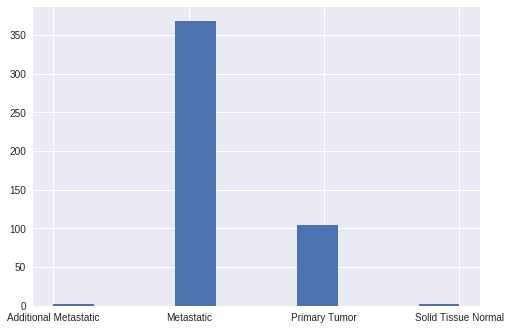

In [13]:
phenotype_meta_table['Sample Type'].hist()

In [0]:
def print_unique_values(df):
    for column in df:
        if (df[column].dtype == "object"):
            print(df.groupby(column).size())
            print("nan values: %d" % (len(df[column]) - df[column].count()))
            print("\n")

In [60]:
print_unique_values(phenotype_meta_table)

SampleID
TCGA-3N-A9WB-06    1
TCGA-3N-A9WC-06    1
TCGA-3N-A9WD-06    1
TCGA-BF-A1PU-01    1
TCGA-BF-A1PV-01    1
                  ..
TCGA-YG-AA3O-06    1
TCGA-YG-AA3P-06    1
TCGA-Z2-A8RT-06    1
TCGA-Z2-AA3S-06    1
TCGA-Z2-AA3V-06    1
Length: 476, dtype: int64
nan values: 0


Sample Type
Additional Metastatic      2
Metastatic               368
Primary Tumor            104
Solid Tissue Normal        2
dtype: int64
nan values: 0


Gender
female    180
male      296
dtype: int64
nan values: 0


Ethnicity
asian                         11
black or african american      1
hispanic or latino            11
white                        437
dtype: int64
nan values: 16


Vital Status
alive    252
dead     224
dtype: int64
nan values: 0


Anatomic Treatment Site
Distant Recurrence      7
Distant site           29
Local Recurrence        8
Primary Tumor Field     5
Regional site          64
dtype: int64
nan values: 363


Location Distant Metastasis
Abdominal wall         1
Adrenal Gland      

Text(0.5,0.98,u'Heatmap')

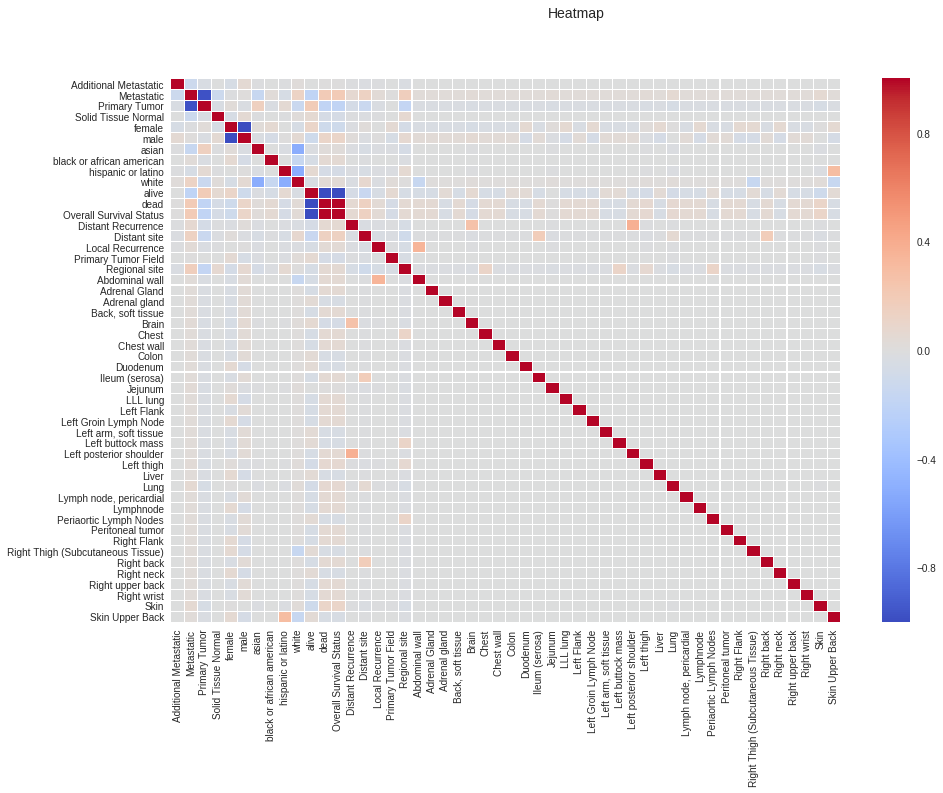

In [20]:
# Similarity Matrix

import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(table):
    f, ax = plt.subplots(figsize=(15, 10))
    corr = table.corr()
    hm = sns.heatmap(corr, annot=False, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
    return f.suptitle('Heatmap', fontsize=14)

plot_similarity_matrix(pmt_v.iloc[:, 0:50])

## OMICS

### Genomics

#### Mutation

In [89]:
mutation_table.head()

,Sample,Chr,Start,Stop,Ref,Alt,Gene,Effect,DNA_VAF,RNA_VAF,Amino_Acid_Change
0,TCGA-D3-A3ML-06,chr5,140182973,140182973,G,A,PCDHA3,Missense_Mutation,0.5,nan,p.D731N
1,TCGA-D3-A3ML-06,chr2,133541884,133541884,C,T,NCKAP5,Missense_Mutation,0.5,nan,p.E834K
2,TCGA-D3-A3ML-06,chr19,51217544,51217544,C,T,SHANK1,Missense_Mutation,0.2,nan,p.G179R
3,TCGA-D3-A3ML-06,chr8,2820757,2820757,G,A,CSMD1,Silent,0.5,nan,p.I3148I
4,TCGA-D3-A3ML-06,chr19,43708353,43708353,C,T,PSG4,Missense_Mutation,0.5,nan,p.E39K


#### CNV

In [93]:
cnv_table.head()

,Gene,Chr,Start,Stop,Strand,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-AAP0-06,TCGA-D3-A1Q1-06,TCGA-D3-A1Q3-06,TCGA-D3-A1Q4-06,TCGA-D3-A1Q5-06,TCGA-D3-A1Q6-06,TCGA-D3-A1Q7-06,TCGA-D3-A1Q8-06,TCGA-D3-A1Q9-06,TCGA-D3-A1QA-06,TCGA-D3-A1QB-06,TCGA-D3-A2J6-06,TCGA-D3-A2J7-06,TCGA-D3-A2J8-06,TCGA-D3-A2J9-06,TCGA-D3-A2JA-06,TCGA-D3-A2JB-06,TCGA-D3-A2JC-06,TCGA-D3-A2JD-06,TCGA-D3-A2JE-06,TCGA-D3-A2JF-06,TCGA-D3-A2JG-06,TCGA-D3-A2JH-06,TCGA-D3-A2JK-06,TCGA-D3-A2JL-06,TCGA-D3-A2JN-06,TCGA-D3-A2JO-06,TCGA-D3-A2JP-06,TCGA-D3-A3BZ-06,TCGA-D3-A3C1-06,TCGA-D3-A3C3-06,TCGA-D3-A3C6-06,TCGA-D3-A3C7-06,TCGA-D3-A3C8-06,TCGA-D3-A3CB-06,TCGA-D3-A3CC-06,TCGA-D3-A3CE-06,TCGA-D3-A3CF-06,TCGA-D3-A3ML-06,TCGA-D3-A3MO-06,TCGA-D3-A3MR-06,TCGA-D3-A3MU-06,...,TCGA-GN-A4U7-06,TCGA-GN-A4U8-06,TCGA-GN-A4U9-06,TCGA-GN-A8LK-06,TCGA-GN-A8LL-06,TCGA-GN-A9SD-06,TCGA-HR-A2OG-06,TCGA-HR-A2OH-06,TCGA-LH-A9QB-06,TCGA-OD-A75X-06,TCGA-QB-A6FS-06,TCGA-QB-AA9O-06,TCGA-RP-A690-06,TCGA-RP-A693-06,TCGA-RP-A694-06,TCGA-RP-A695-06,TCGA-RP-A6K9-06,TCGA-W3-A824-06,TCGA-W3-A825-06,TCGA-W3-A828-06,TCGA-W3-AA1O-06,TCGA-W3-AA1Q-06,TCGA-W3-AA1R-06,TCGA-W3-AA1V-06,TCGA-W3-AA1W-06,TCGA-W3-AA21-06,TCGA-WE-A8JZ-06,TCGA-WE-A8K1-06,TCGA-WE-A8K5-06,TCGA-WE-A8K6-06,TCGA-WE-A8ZM-06,TCGA-WE-A8ZN-06,TCGA-WE-A8ZO-06,TCGA-WE-A8ZQ-06,TCGA-WE-A8ZT-06,TCGA-WE-A8ZX-06,TCGA-WE-A8ZY-06,TCGA-WE-AA9Y-06,TCGA-WE-AAA0-06,TCGA-WE-AAA3-06,TCGA-WE-AAA4-06,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
0,A1BG,chr19,58856544.0,58864865.0,-,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,-1,1,0,0,0,0,-1,0,1,1,0,0,0,0,0,0,0,-1,-1,0,0,0,0,-1,...,-1,0,0,0,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,1,-1,0,-1,0,0,0,0,1,1,-1,0,1,0,0,0,-1,0,1,-1,0,0,0
1,A1CF,chr10,52559169.0,52645435.0,-,0,0,-1,-1,0,0,-1,-2,-1,-1,-1,-1,0,0,0,0,0,0,-1,0,-1,-1,0,0,-1,0,-1,-1,-1,-1,-2,0,-1,-1,-1,0,0,0,0,-1,-1,0,-1,-1,-1,...,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,1,0,-1,-1,0,-1,0,-1,0,0,0,0,0,0,-1,-1,0,-1,-1,-1,0,0,-1,-1,-1,-1,-1,0,-1,-1,0,0,-2,-1,-1,-1,0,-1,-1
2,A2M,chr12,9220260.0,9268825.0,-,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,-1,0,0,-1,0,1,0,0,0,2,1,1,0,0,0,0,...,0,0,0,1,2,0,0,-1,-1,-1,0,0,0,-1,0,-1,-1,0,1,0,0,1,1,0,1,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-2,-1,1,1,0,0,0
3,A2ML1,chr12,8975068.0,9039597.0,+,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,-1,0,0,-1,0,1,0,0,0,2,1,1,0,0,0,0,...,0,0,0,1,2,0,0,-1,-1,-1,0,0,0,-1,0,-1,-1,0,1,0,0,1,1,0,1,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-2,-1,1,1,0,0,0
4,A2MP1,chr12,9381129.0,9428413.0,-,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,-1,0,0,-1,0,1,0,0,0,2,1,1,0,0,0,0,...,0,0,0,1,2,0,0,-1,-1,-1,0,0,0,-1,0,-1,-1,0,1,0,0,1,1,0,1,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-2,-1,1,1,0,0,0


In [31]:
cnv_table.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,24752,24753,24754,24755,24756,24757,24758,24759,24760,24761,24762,24763,24764,24765,24766,24767,24768,24769,24770,24771,24772,24773,24774,24775,24776,24777,24778,24779,24780,24781,24782,24783,24784,24785,24786,24787,24788,24789,24790,24791,24792,24793,24794,24795,24796,24797,24798,24799,24800,24801
Gene,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCB10,ABCB11,...,U6|ENSG00000266839.2,U6|ENSG00000271819.1,U6|ENSG00000271923.1,U6|ENSG00000271932.1,U6|ENSG00000272028.1,U6|ENSG00000272262.1,U6|ENSG00000272292.1,U6|ENSG00000272337.1,U6|ENSG00000272393.1,U6|ENSG00000272439.1,U6|ENSG00000272445.1,U6|ENSG00000272507.1,U7|ENSG00000271841.1,U7|ENSG00000272215.1,U8|ENSG00000199713.1,U8|ENSG00000200026.1,U8|ENSG00000200191.1,U8|ENSG00000200496.1,U8|ENSG00000201398.1,U8|ENSG00000201809.1,U8|ENSG00000201810.1,U8|ENSG00000202269.1,U8|ENSG00000202537.1,U8|ENSG00000206987.1,U8|ENSG00000207430.1,U8|ENSG00000207432.1,U8|ENSG00000212144.1,U8|ENSG00000212145.2,U8|ENSG00000212249.2,U8|ENSG00000212581.1,U8|ENSG00000212594.1,U8|ENSG00000238519.1,U8|ENSG00000238840.1,U8|ENSG00000238963.1,U8|ENSG00000239142.1,U8|ENSG00000239148.1,U8|ENSG00000251740.1,U8|ENSG00000251909.1,U8|ENSG00000252602.1,U8|ENSG00000253004.1,UQCC,VAMP7|ENSG00000124333.10,Vault|ENSG00000251900.1,Vault|ENSG00000252283.1,Vault|ENSG00000252328.1,Vault|ENSG00000252485.1,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7,WBP7,ZBED1|ENSG00000214717.4
Chr,chr19,chr10,chr12,chr12,chr12,chr1,chr22,chr3,chr12,chr12,chr5,chr3,chr3,chr1,chr1,chr4,chr9,chr15,chr2,chr11,chr2,chr17,chr20,chr8,chr16,chr6,chr17,chr4,chr11,chr7,chr17,chr17,chr16,chr9,chr17,chr4,chr2,chr7,chr16,chr9,chr16,chr1,chr17,chr17,chr19,chr17,chr17,chr7,chr1,chr2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start,58856544.0,52559169.0,9220260.0,8975068.0,9381129.0,33772367.0,43088127.0,137842560.0,53701240.0,125549925.0,178191862.0,151531825.0,151451704.0,12776118.0,12704566.0,170981373.0,99401859.0,67493371.0,69688532.0,77532155.0,219128850.0,74449433.0,34824381.0,117950438.0,70286198.0,44267391.0,41102543.0,57204456.0,105946228.0,121715701.0,35306175.0,79091095.0,8768422.0,107543283.0,67143355.0,419224.0,215796266.0,48211055.0,2389151.0,139901686.0,2325882.0,94458393.0,67240452.0,67074843.0,1040102.0,66863433.0,66970629.0,87133175.0,229652329.0,169779448.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stop,58864865.0,52645435.0,9268825.0,9039597.0,9428413.0,33786699.0,43117304.0,137851229.0,53718648.0,125627873.0,178245436.0,151546276.0,151479127.0,12788726.0,12727097.0,171012850.0,99417585.0,67547533.0,69901481.0,77629478.0,219134980.0,74466199.0,34858840.0,117956726.0,70323446.0,44281063.0,41116515.0,57253666.0,105969437.0,121784334.0,35414171.0,79139877.0,8878432.0,107690518.0,67240987.0,467918.0,216003151.0,48687092.0,2476700.0,139923367.0,2390747.0,94586688.0,67323385.0,67138029.0,1065571.0,66951533.0,67057205.0,87342611.0,229694442.0,169887832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strand,-,-,-,+,-,-,-,-,-,+,-,+,+,+,+,-,-,-,-,+,-,+,+,+,-,-,-,-,+,-,+,-,+,-,-,-,-,+,+,-,-,-,-,-,+,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Epigenomics

#### Methylation

In [91]:
methylation_table_1k.head()

,probeID,Chr,Start,Stop,Strand,Gene,Relation_CpG_Island,TCGA-FR-A728-01,TCGA-GN-A4U8-11,TCGA-GN-A8LL-06,TCGA-FR-A8YC-06,TCGA-DA-A95X-06,TCGA-ER-A42K-06,TCGA-D3-A8GO-06,TCGA-D3-A8GK-06,TCGA-WE-A8JZ-06,TCGA-WE-A8ZO-06,TCGA-D3-A8GI-06,TCGA-FS-A4FC-06,TCGA-FS-A4F2-06,TCGA-WE-A8ZM-06,TCGA-WE-A8ZT-06,TCGA-D3-A8GQ-06,TCGA-D3-A8GB-06,TCGA-DA-A95Y-06,TCGA-EE-A3JI-06,TCGA-OD-A75X-06,TCGA-DA-A960-01,TCGA-D3-A8GV-06,TCGA-WE-A8ZN-06,TCGA-D3-A8GN-06,TCGA-EB-A550-01,TCGA-BF-A5EQ-01,TCGA-EB-A3HV-01,TCGA-HR-A5NC-01,TCGA-DA-A95Z-06,TCGA-EB-A6QZ-01,TCGA-FW-A3I3-06,TCGA-WE-A8K6-06,TCGA-D3-A8GP-06,TCGA-EB-A42Z-01,TCGA-GN-A4U4-06,TCGA-GF-A4EO-06,TCGA-GN-A8LK-06,TCGA-WE-A8K4-01,TCGA-DA-A95W-06,TCGA-FW-A5DX-01,TCGA-GN-A4U3-06,TCGA-EB-A6QY-01,TCGA-EB-A5VU-01,...,TCGA-W3-AA1W-06,TCGA-DA-A1I0-06,TCGA-D3-A51F-06,TCGA-IH-A3EA-01,TCGA-EB-A431-01,TCGA-EB-A97M-01,TCGA-BF-AAOX-01,TCGA-DA-A3F5-06,TCGA-YD-A9TA-06,TCGA-DA-A3F2-06,TCGA-EB-A44O-01,TCGA-EB-A4IQ-01,TCGA-EB-A4IS-01,TCGA-YG-AA3O-06,TCGA-ER-A3EV-06,TCGA-3N-A9WD-06,TCGA-BF-A3DM-01,TCGA-XV-A9W2-01,TCGA-W3-AA1Q-06,TCGA-WE-AAA0-06,TCGA-W3-AA1R-06,TCGA-EE-A3J5-06,TCGA-EB-A4OY-01,TCGA-FS-A4FD-06,TCGA-BF-AAP0-06,TCGA-YG-AA3P-06,TCGA-EE-A3JA-06,TCGA-W3-AA21-06,TCGA-WE-AAA3-06,TCGA-FS-A4F4-06,TCGA-BF-A3DN-01,TCGA-ER-A3ET-06,TCGA-W3-AA1O-06,TCGA-D3-A51E-06,TCGA-Z2-AA3S-06,TCGA-YG-AA3N-01,TCGA-WE-AA9Y-06,TCGA-FS-A4F5-06,TCGA-EE-A3J7-06,TCGA-FS-A4F8-06,TCGA-DA-A3F3-06,TCGA-D3-A51H-06,TCGA-BF-A3DL-01,TCGA-D3-A51T-06,TCGA-D3-A51K-06,TCGA-EB-A44P-01,TCGA-D9-A4Z5-01,TCGA-WE-AAA4-06,TCGA-3N-A9WB-06,TCGA-EE-A3J8-06
0,cg00000029,chr16,53468111,53468113,-,RBL2,N_Shore,0.7,0.5,0.1,0.6,0.5,0.2,0.3,0.1,0.2,0.2,0.4,0.7,0.2,0.1,0.3,0.2,0.7,0.6,0.1,0.7,0.5,0.8,0.6,0.4,0.2,0.8,0.3,0.1,0.4,0.8,0.1,0.1,0.4,0.9,0.2,0.7,0.2,0.4,0.2,0.2,0.2,0.4,0.1,...,0.8,0.7,0.5,0.6,0.3,0.7,0.1,0.3,0.5,0.6,0.2,0.3,0.4,0.2,0.3,0.2,0.1,0.2,0.8,0.6,0.5,0.3,0.5,0.1,0.6,0.1,0.2,0.3,0.4,0.6,0.2,0.4,0.8,0.2,0.7,0.8,0.3,0.1,0.6,0.6,0.1,0.6,0.2,0.1,0.3,0.3,0.1,0.7,0.5,0.0
1,cg00000108,chr3,37459205,37459207,-,C3orf35,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,cg00000109,chr3,171916036,171916038,-,FNDC3B,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,cg00000165,chr1,91194673,91194675,+,BARHL2,S_Shore,0.5,0.4,0.9,0.9,0.6,0.9,0.4,0.9,0.7,0.8,0.9,0.6,0.6,0.9,0.4,0.7,0.2,0.9,0.9,0.9,0.7,0.7,0.6,0.5,0.6,0.8,0.7,0.8,0.9,0.8,0.9,0.8,0.9,0.9,0.8,0.6,0.9,0.4,0.9,0.9,0.8,0.7,0.1,...,0.5,0.7,0.3,0.6,0.8,0.9,0.8,0.6,0.8,0.2,0.8,0.7,0.6,0.8,0.8,0.3,0.9,0.6,0.7,0.4,0.8,0.8,0.7,0.4,0.3,0.9,0.6,0.9,0.6,0.6,0.8,0.8,0.9,0.7,0.9,0.8,0.3,0.6,0.9,0.4,0.9,0.1,0.5,0.6,0.9,0.8,0.9,0.5,0.9,0.1
4,cg00000236,chr8,42263293,42263295,+,VDAC3,NaN,0.8,0.9,0.7,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.8,0.9,0.8,0.8,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,0.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.7


In [32]:
methylation_table_1k.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9949,9950,9951,9952,9953,9954,9955,9956,9957,9958,9959,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998
probeID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,cg00000658,cg00000714,cg00000721,cg00000734,cg00000769,cg00000807,cg00000884,cg00000905,cg00000924,cg00000948,cg00000957,cg00001099,cg00001245,cg00001249,cg00001261,cg00001269,cg00001349,cg00001364,cg00001446,cg00001510,cg00001534,cg00001582,cg00001583,cg00001593,cg00001594,cg00001687,cg00001747,cg00001791,cg00001793,cg00001809,cg00001854,cg00001874,cg00001930,cg00002028,cg00002033,cg00002080,cg00002116,cg00002145,cg00002190,cg00002224,...,cg00470044,cg00470051,cg00470117,cg00470154,cg00470183,cg00470192,cg00470277,cg00470341,cg00470505,cg00470565,cg00470636,cg00470641,cg00470761,cg00470766,cg00470768,cg00470786,cg00470794,cg00470817,cg00470882,cg00470924,cg00470934,cg00470955,cg00470972,cg00471000,cg00471012,cg00471059,cg00471110,cg00471141,cg00471142,cg00471159,cg00471190,cg00471309,cg00471368,cg00471371,cg00471400,cg00471536,cg00471562,cg00471645,cg00471664,cg00471696,cg00471768,cg00471810,cg00471857,cg00471903,cg00471966,cg00471989,cg00472029,cg00472136,cg00472276,cg00472277
Chr,chr16,chr3,chr3,chr1,chr8,chr14,chr16,chr8,chr1,chr15,chr9,chr19,chr6,chr3,chr12,chr2,chr4,chr15,chr11,chr8,chr1,chr8,chr3,chr14,chr16,chr20,chr1,chr1,chr1,chr19,chr1,chr10,chr1,chr1,chr2,chr16,chr2,chr2,chr12,chr14,chr16,chr10,chr18,chr1,chr19,chr21,chr17,chr2,chr8,chr8,...,chr2,chr6,chr2,chr7,chr6,chr16,chr7,chr2,chr9,chr22,chr8,chr10,chr10,chr12,chr15,chr2,chr12,chr12,chr3,chr16,chr11,chr16,chr2,chr20,chr11,chr5,chr22,chr8,chr19,chr7,chr16,chr6,chr16,chr18,chr20,chr11,chr10,chr2,chr19,chr2,chr20,chr11,chr7,chr15,chr19,chr16,chr13,chr12,chr17,chr11
Start,53468111,37459205,171916036,91194673,42263293,69341138,28890099,41167801,230560792,23034446,139997923,54695677,25282778,128902376,124086476,23913413,154609856,59785305,2720462,49890608,5937252,87081552,15106709,60389785,3463963,48959003,166958438,214170375,43831040,54746944,51034864,80828701,200011785,170490433,11484704,89761660,105460262,103414041,11905389,101154024,47008490,69990587,60055083,20960009,39798480,30390416,79670409,238249535,19555032,144120398,...,28456183,168683005,58478330,66044686,116575912,28953866,2669914,183237786,139596116,22469146,26440348,3096218,134595984,42984235,41285146,18740678,133464684,6741881,122380165,75600068,73499133,7354431,234590864,31618467,115595870,179562619,30277390,19796298,39806764,107641795,3115808,2785673,81817628,74114727,61196899,81795747,1102372,11270191,42462945,173955213,14319124,89463688,154000015,45444917,37569349,30380182,100619841,57410603,66197218,2327754
Stop,53468113,37459207,171916038,91194675,42263295,69341140,28890101,41167803,230560794,23034448,139997925,54695679,25282780,128902378,124086478,23913415,154609858,59785307,2720464,49890610,5937254,87081554,15106711,60389787,3463965,48959005,166958440,214170377,43831042,54746946,51034866,80828703,200011787,170490435,11484706,89761662,105460264,103414043,11905391,101154026,47008492,69990589,60055085,20960011,39798482,30390418,79670411,238249537,19555034,144120400,...,28456185,168683007,58478332,66044688,116575914,28953868,2669916,183237788,139596118,22469148,26440350,3096220,134595986,42984237,41285148,18740680,133464686,6741883,122380167,75600070,73499135,7354433,234590866,31618469,115595872,179562621,30277392,19796300,39806766,107641797,3115810,2785675,81817630,74114729,61196901,81795749,1102374,11270193,42462947,173955215,14319126,89463690,154000017,45444919,37569351,30380184,100619843,57410605,66197220,2327756
Strand,-,-,-,+,+,-,-,+,-,-,+,-,+,-,-,-,+,+,-,-,-,-,+,-,-,+,+,+,+,+,+,+,+,+,-,

### Transcriptomics

#### Gene Expression

In [90]:
gene_expression_table_1k.head()

,Gene,Chr,Start,Stop,Strand,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,TCGA-BF-A3DJ-01,TCGA-BF-A3DL-01,TCGA-BF-A3DM-01,TCGA-BF-A3DN-01,TCGA-BF-A5EO-01,TCGA-BF-A5EP-01,TCGA-BF-A5EQ-01,TCGA-BF-A5ER-01,TCGA-BF-A5ES-01,TCGA-BF-A9VF-01,TCGA-BF-AAOU-01,TCGA-BF-AAOX-01,TCGA-BF-AAP0-06,TCGA-BF-AAP1-01,TCGA-BF-AAP2-01,TCGA-BF-AAP4-01,TCGA-BF-AAP6-01,TCGA-BF-AAP7-01,TCGA-BF-AAP8-01,TCGA-D3-A1Q1-06,TCGA-D3-A1Q3-06,TCGA-D3-A1Q4-06,TCGA-D3-A1Q5-06,TCGA-D3-A1Q6-06,TCGA-D3-A1Q7-06,TCGA-D3-A1Q8-06,TCGA-D3-A1Q9-06,TCGA-D3-A1QA-06,TCGA-D3-A1QA-07,TCGA-D3-A1QB-06,TCGA-D3-A2J6-06,TCGA-D3-A2J7-06,TCGA-D3-A2J8-06,TCGA-D3-A2J9-06,TCGA-D3-A2JA-06,TCGA-D3-A2JB-06,TCGA-D3-A2JC-06,...,TCGA-OD-A75X-06,TCGA-QB-A6FS-06,TCGA-QB-AA9O-06,TCGA-RP-A690-06,TCGA-RP-A693-06,TCGA-RP-A694-06,TCGA-RP-A695-06,TCGA-RP-A6K9-06,TCGA-W3-A824-06,TCGA-W3-A825-06,TCGA-W3-A828-06,TCGA-W3-AA1O-06,TCGA-W3-AA1Q-06,TCGA-W3-AA1R-06,TCGA-W3-AA1V-06,TCGA-W3-AA1W-06,TCGA-W3-AA21-06,TCGA-WE-A8JZ-06,TCGA-WE-A8K1-06,TCGA-WE-A8K4-01,TCGA-WE-A8K5-06,TCGA-WE-A8K6-06,TCGA-WE-A8ZM-06,TCGA-WE-A8ZN-06,TCGA-WE-A8ZO-06,TCGA-WE-A8ZQ-06,TCGA-WE-A8ZR-06,TCGA-WE-A8ZT-06,TCGA-WE-A8ZX-06,TCGA-WE-A8ZY-06,TCGA-WE-AA9Y-06,TCGA-WE-AAA0-06,TCGA-WE-AAA3-06,TCGA-WE-AAA4-06,TCGA-XV-A9VZ-01,TCGA-XV-A9W2-01,TCGA-XV-A9W5-01,TCGA-XV-AAZV-01,TCGA-XV-AAZW-01,TCGA-XV-AAZY-01,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
0,A1BG,chr19,58856544,58864865,-,0.4,0.2,0.3,0.2,0.4,0.2,0.3,0.4,0.2,0.2,0.2,0.3,0.2,0.3,0.2,0.1,0.2,0.6,0.3,0.3,0.5,0.5,0.5,0.4,0.6,0.2,0.6,0.4,0.3,0.3,0.7,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.4,...,0.2,0.2,0.4,0.4,0.4,0.5,0.3,0.3,0.3,0.4,0.1,0.4,0.3,0.5,0.2,0.4,0.4,0.7,0.4,0.4,0.3,0.2,0.5,0.2,0.3,0.6,0.7,0.4,0.5,0.4,0.1,0.3,0.3,0.2,0.4,0.1,0.2,0.3,0.6,0.5,0.3,0.2,0.2,0.3,0.4,0.4,0.0,0.3,0.3,0.3
1,A1BG-AS1,chr19,58859117,58866549,+,1.5,1.5,1.3,1.2,1.4,1.3,1.5,2.0,1.2,1.5,1.2,1.3,1.9,1.7,2.0,1.3,1.7,2.2,1.4,1.7,2.2,1.3,1.3,1.4,1.9,1.4,1.0,1.2,1.6,0.9,1.3,2.3,1.4,2.0,1.1,1.5,1.4,1.4,1.6,1.5,1.4,1.3,1.7,1.1,1.4,...,1.7,1.6,1.5,1.7,1.9,1.4,1.6,1.5,1.5,1.6,0.8,1.5,1.1,1.4,1.1,1.8,1.2,1.7,1.3,2.6,1.1,1.4,1.4,1.0,1.2,1.5,2.4,1.3,1.3,2.0,0.6,1.7,2.0,1.7,1.4,0.5,1.3,1.5,1.5,1.4,1.2,1.0,0.8,1.4,1.4,1.6,0.5,1.2,1.6,1.4
2,A1CF,chr10,52559169,52645435,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A2M,chr12,9220260,9268825,-,4.2,10.4,7.0,5.6,4.1,7.8,4.7,5.6,11.5,5.7,5.2,6.7,8.5,5.8,8.3,6.5,7.0,5.5,8.1,9.5,7.4,5.0,6.4,7.1,7.1,6.6,7.9,7.3,6.2,7.5,8.3,3.8,9.6,8.7,6.1,6.1,6.6,9.3,5.2,7.3,6.0,8.6,8.2,6.1,7.8,...,5.9,8.2,8.7,8.7,8.3,5.6,6.8,8.2,7.3,7.2,9.1,6.6,8.9,7.9,5.4,5.6,4.7,7.1,7.0,5.9,7.2,9.8,9.8,6.7,8.8,8.0,6.2,3.8,7.7,5.4,7.0,8.4,6.7,9.3,5.0,7.2,8.6,6.9,5.0,6.8,6.6,7.2,6.7,7.8,6.1,8.2,5.9,7.4,5.1,8.0
4,A2M-AS1,chr12,9217773,9220651,+,0.6,1.6,0.7,1.3,0.2,0.4,0.7,0.2,1.9,0.1,1.5,1.4,0.5,0.3,0.3,0.1,0.4,0.8,1.8,0.4,0.9,2.0,2.8,1.2,0.4,0.4,2.0,0.9,1.5,1.6,2.5,0.8,0.7,0.7,1.6,0.1,0.1,1.2,1.0,1.7,0.2,1.4,1.0,0.4,0.7,...,0.3,0.5,0.9,1.3,0.9,0.4,0.6,0.9,0.2,0.3,1.3,0.3,0.1,0.2,0.1,0.3,0.4,3.1,1.1,2.6,1.3,1.8,2.5,0.7,1.9,3.1,1.5,2.5,0.3,2.2,0.5,1.7,0.1,0.5,0.7,1.3,1.5,0.9,0.3,0.3,0.3,0.2,0.5,1.1,0.4,0.3,2.1,2.0,0.3,0.2


#### miRNA

In [88]:
mi_rna_table.head()

,MIMATID,Name,Chr,Start,Stop,Strand,TCGA-EB-A4P0-01,TCGA-D3-A1Q5-06,TCGA-EE-A17X-06,TCGA-EE-A2MI-06,TCGA-DA-A3F5-06,TCGA-WE-A8ZN-06,TCGA-D9-A4Z3-01,TCGA-RP-A695-06,TCGA-EE-A2GS-06,TCGA-DA-A95Y-06,TCGA-EE-A3J3-06,TCGA-EB-A5VU-01,TCGA-ER-A19K-01,TCGA-BF-A1Q0-01,TCGA-WE-A8K1-06,TCGA-EE-A29H-06,TCGA-FS-A1ZF-06,TCGA-DA-A1HW-06,TCGA-D3-A1Q4-06,TCGA-BF-AAP2-01,TCGA-FS-A1YY-06,TCGA-EB-A5UN-06,TCGA-D3-A2JG-06,TCGA-HR-A5NC-01,TCGA-EB-A3XB-01,TCGA-W3-AA1V-06,TCGA-EE-A3AC-06,TCGA-GN-A267-06,TCGA-ER-A2ND-06,TCGA-EB-A550-01,TCGA-EB-A42Y-01,TCGA-EB-A4OY-01,TCGA-ER-A19A-06,TCGA-EE-A20C-06,TCGA-EE-A2M8-06,TCGA-D3-A8GD-06,TCGA-EE-A3JE-06,TCGA-EE-A20F-06,TCGA-EB-A430-01,TCGA-EE-A29D-06,TCGA-D3-A3CC-06,TCGA-EB-A3Y6-01,TCGA-ER-A1A1-06,TCGA-D3-A5GS-06,...,TCGA-D3-A8GC-06,TCGA-EB-A3HV-01,TCGA-3N-A9WD-06,TCGA-D3-A2JA-06,TCGA-EE-A2MR-06,TCGA-ER-A194-01,TCGA-DA-A3F3-06,TCGA-EE-A2GL-06,TCGA-DA-A95W-06,TCGA-D9-A6EA-06,TCGA-EE-A2GM-06,TCGA-FR-A8YC-06,TCGA-FS-A1ZM-06,TCGA-BF-AAP7-01,TCGA-YG-AA3P-06,TCGA-WE-A8ZQ-06,TCGA-FR-A69P-06,TCGA-EE-A2GN-06,TCGA-D3-A2JO-06,TCGA-D3-A1QB-06,TCGA-D9-A4Z6-06,TCGA-GN-A8LN-01,TCGA-W3-AA21-06,TCGA-GN-A265-06,TCGA-DA-A1I0-06,TCGA-DA-A1I2-06,TCGA-EE-A2GK-06,TCGA-FS-A1ZT-06,TCGA-GN-A8LK-06,TCGA-FS-A1ZU-06,TCGA-D3-A8GL-06,TCGA-GN-A4U5-01,TCGA-W3-AA1O-06,TCGA-EE-A3J8-06,TCGA-WE-AAA4-06,TCGA-BF-A3DN-01,TCGA-D3-A8GS-06,TCGA-EE-A20H-06,TCGA-FS-A1ZZ-06,TCGA-ER-A19M-06,TCGA-D3-A2J7-06,TCGA-EE-A3J4-06,TCGA-EB-A3XD-01,TCGA-DA-A1HY-06,TCGA-EE-A2GC-06,TCGA-FS-A4F5-06,TCGA-EE-A3AF-06,TCGA-D9-A149-06,TCGA-GF-A2C7-01,TCGA-EE-A2ML-06
0,MIMAT0000062,hsa-let-7a-5p,chr11,122017276,122017297,-,16.0,14.5,16.7,16.4,15.9,15.9,14.1,15.5,14.7,16.3,15.4,15.1,15.3,15.3,15.9,16.0,15.2,15.9,15.4,14.7,15.4,15.6,15.3,15.7,15.0,15.7,16.4,15.1,16.4,15.7,15.6,15.3,16.0,16.4,16.4,15.3,16.1,15.6,15.8,14.5,15.9,15.2,16.0,16.3,...,15.8,15.6,16.6,15.7,16.4,15.5,15.3,16.5,16.5,15.8,15.6,16.5,15.5,15.0,16.5,16.4,14.9,16.1,15.0,15.0,15.3,16.4,16.0,15.6,17.2,15.4,16.6,14.5,15.6,13.4,15.9,15.2,16.1,15.9,15.9,16.4,15.8,15.3,15.3,15.3,15.4,16.6,16.5,16.6,15.8,14.8,15.3,15.3,15.3,16.3
1,MIMAT0000063,hsa-let-7b-5p,chr22,46509571,46509592,+,15.3,13.4,16.1,15.7,14.6,13.4,11.4,13.7,12.8,14.1,14.7,14.2,14.4,13.1,14.1,13.7,14.8,12.9,14.8,13.0,14.2,13.3,12.5,14.3,14.2,14.1,11.2,13.6,15.2,15.2,13.9,13.5,15.3,15.7,15.0,13.7,14.6,13.8,14.9,14.7,14.3,14.2,14.9,14.7,...,15.7,15.0,15.1,14.1,14.7,14.2,13.0,15.2,14.0,14.8,13.5,13.0,14.8,14.0,13.3,13.6,13.4,13.7,13.1,12.7,13.4,14.2,13.8,14.2,16.9,14.5,15.6,12.9,12.1,10.6,15.0,14.2,14.4,15.6,14.6,15.8,12.3,14.4,11.9,15.0,14.9,15.1,15.9,14.6,14.4,13.1,14.4,12.9,13.1,15.3
2,MIMAT0000064,hsa-let-7c-5p,chr21,17912158,17912179,+,8.5,11.7,8.3,11.6,9.0,10.9,9.5,9.8,12.0,11.5,11.6,10.2,10.2,9.7,11.1,7.9,11.2,9.3,11.8,12.3,12.1,10.5,12.2,10.6,9.0,9.1,10.0,9.7,12.4,11.4,8.8,10.7,11.3,8.9,11.7,10.6,11.5,7.8,11.0,8.9,12.7,11.2,10.2,8.7,...,8.5,10.8,13.4,10.1,9.6,10.7,11.8,11.4,11.5,8.6,11.6,10.8,10.8,10.6,13.4,12.9,10.7,11.1,8.4,8.6,10.8,11.9,8.3,10.0,11.2,12.2,10.4,9.9,10.1,9.5,10.6,10.3,10.3,13.5,10.1,9.7,10.3,12.0,6.6,10.5,11.8,10.3,13.2,10.4,8.7,11.0,8.8,8.4,9.9,9.4
3,MIMAT0000065,hsa-let-7d-5p,chr9,96941123,96941144,+,10.3,8.2,10.2,8.4,7.9,9.2,6.2,9.9,7.9,9.2,9.0,8.7,8.5,8.1,9.4,9.4,10.0,7.2,8.5,9.0,7.9,8.6,7.7,8.5,9.2,8.7,6.2,9.2,10.8,8.5,9.2,8.9,8.4,8.1,9.3,9.9,8.7,9.3,10.0,8.3,9.3,8.8,9.2,8.9,...,9.6,7.8,9.5,7.8,8.6,8.9,9.0,9.6,9.1,10.0,7.6,8.2,8.1,8.6,10.0,9.7,7.8,7.5,8.0,7.7,8.4,8.7,10.0,8.4,10.4,8.7,10.1,7.8,9.2,6.7,10.0,8.6,10.5,8.1,9.2,8.7,7.9,9.2,5.8,9.1,8.2,9.7,7.8,8.9,8.7,7.6,8.7,8.1,9.3,9.3
4,MIMAT0000066,hsa-let-7e-5p,chr19,52196046,52196067,+,11.9,11.9,11.9,11.2,11.0,11.0,11.9,12.4,12.7,11.9,12.4,11.4,10.7,10.9,11.5,11.1,11.6,11.1,11.9,8.8,12.7,12.2,11.6,12.1,10.4,12.1,11.4,11.5,11.9,12.1,11.3,10.7,11.2,10.8,11.8,9.6,10.4,11.6,11.0,9.0,11.4,11.0,10.4,9.8,...,10.9,10.3,12.5,11.0,11.7,8.8,11.9,13.5,12.8,11.8,8.7,12.1,12.0,10.4,13.0,12.6,10.2,11.5,10.5,12.0,10.7,12.6,12.1,10.9,11.6,11.5,11.8,10.5,12.1,10.9,12.5,10.9,11.2,12.0,11.6,12.7

### Proteomics

#### Proteome

In [94]:
proteome_table.head()

,ProteinID,TCGA-EE-A2MP-06,TCGA-EE-A29B-06,TCGA-ER-A19C-06,TCGA-ER-A19T-01,TCGA-ER-A19K-01,TCGA-DA-A3F3-06,TCGA-ER-A19G-06,TCGA-D9-A148-06,TCGA-EE-A29L-06,TCGA-GN-A262-06,TCGA-EE-A2M5-06,TCGA-EE-A29T-06,TCGA-FS-A1ZM-06,TCGA-D3-A1Q4-06,TCGA-ER-A19O-06,TCGA-D3-A2JN-06,TCGA-ER-A2NF-06,TCGA-ER-A19L-06,TCGA-EE-A2M8-06,TCGA-FS-A1ZD-06,TCGA-FW-A3TV-06,TCGA-D3-A2JD-06,TCGA-EE-A3JD-06,TCGA-EE-A3JE-06,TCGA-EE-A29M-06,TCGA-D9-A1JW-06,TCGA-ER-A197-06,TCGA-EB-A3XB-01,TCGA-FS-A1Z3-06,TCGA-EE-A3JH-06,TCGA-GN-A268-06,TCGA-EE-A2ML-06,TCGA-EE-A3JA-06,TCGA-EE-A2A6-06,TCGA-EE-A29S-06,TCGA-DA-A1I8-06,TCGA-EB-A3XE-01,TCGA-DA-A1I2-06,TCGA-FS-A1ZC-06,TCGA-EE-A2MM-06,TCGA-FS-A1ZN-01,TCGA-GN-A266-06,TCGA-D3-A2JO-06,TCGA-EE-A2GS-06,TCGA-DA-A3F5-06,TCGA-ER-A19D-06,TCGA-ER-A2NB-01,TCGA-EE-A29E-06,TCGA-EB-A24C-01,...,TCGA-EB-A4XL-01,TCGA-RP-A693-06,TCGA-EB-A44O-01,TCGA-FR-A726-01,TCGA-DA-A95Z-06,TCGA-GN-A4U8-06,TCGA-BF-AAOX-01,TCGA-ER-A42L-06,TCGA-BF-AAOU-01,TCGA-EB-A5SE-01,TCGA-ER-A42K-06,TCGA-DA-A95X-06,TCGA-EB-A550-01,TCGA-EB-A5VV-06,TCGA-D9-A4Z3-01,TCGA-D3-A51H-06,TCGA-LH-A9QB-06,TCGA-DA-A95W-06,TCGA-EB-A42Z-01,TCGA-EB-A431-01,TCGA-RP-A694-06,TCGA-XV-A9W2-01,TCGA-GF-A6C9-06,TCGA-EB-A430-01,TCGA-EB-A4IS-01,TCGA-EB-A551-01,TCGA-FR-A8YC-06,TCGA-DA-A960-01,TCGA-D3-A51E-06,TCGA-XV-AB01-01,TCGA-YD-A9TB-06,TCGA-EB-A5FP-01,TCGA-EB-A5SG-06,TCGA-EB-A57M-01,TCGA-FR-A729-06,TCGA-EB-A5SH-06,TCGA-D3-A8GD-06,TCGA-WE-A8ZO-06,TCGA-XV-A9VZ-01,TCGA-D3-A8GK-06,TCGA-YG-AA3O-06,TCGA-WE-A8ZT-06,TCGA-WE-A8JZ-06,TCGA-Z2-AA3V-06,TCGA-D3-A8GM-06,TCGA-XV-AAZY-01,TCGA-D9-A6EA-06,TCGA-BF-AAP0-06,TCGA-D9-A4Z2-01,TCGA-FS-A1ZZ-06
0,14-3-3_epsilon-M-C,-0.0,0.1,-0.2,-0.2,0.3,-0.1,0.2,-0.2,0.2,0.1,0.4,-0.0,0.1,0.1,0.5,-0.1,0.2,-0.1,-0.3,-0.1,0.0,-0.3,0.1,0.0,-0.0,-0.2,0.1,0.1,0.0,0.1,-0.0,0.4,0.3,-0.2,-0.2,0.1,0.1,-0.1,0.1,0.1,-0.0,-0.0,0.0,-0.1,0.2,-0.2,0.0,0.2,0.1,...,0.1,0.3,0.1,0.0,0.0,0.1,-0.3,0.1,-0.1,-0.2,-0.1,0.0,-0.0,-0.7,-0.3,0.2,-0.1,0.2,-0.4,-0.4,0.4,0.0,0.0,0.1,-0.5,-0.4,0.1,0.7,0.0,0.1,0.0,0.0,0.4,-0.6,-0.1,0.1,0.2,-0.4,-0.4,0.1,-0.2,0.3,-0.2,0.4,0.3,-0.0,-0.0,-0.2,-0.4,-0.5
1,4E-BP1-R-V,-0.3,-0.2,0.1,-0.6,0.3,-0.8,0.8,0.1,0.7,0.2,1.2,-0.8,0.7,0.0,-1.1,0.1,0.4,0.2,-0.2,-0.0,0.4,-0.1,-0.3,-0.1,0.3,-0.3,-0.5,-0.4,0.1,-0.5,0.4,0.4,-0.3,-0.5,0.2,0.6,-0.3,0.0,2.0,-0.1,0.1,-0.2,0.5,0.1,1.3,-0.4,-0.6,0.3,-0.6,...,0.2,1.5,0.5,0.4,0.7,-0.1,0.3,-0.1,-0.2,0.2,0.8,0.6,-0.2,-0.8,0.7,-0.2,-0.0,0.6,-0.6,0.6,0.4,0.4,0.1,-0.1,-1.5,-1.2,-1.1,-0.5,0.2,-0.0,0.1,-0.0,0.1,-0.1,-0.1,0.5,0.0,-0.6,-0.8,0.4,0.2,0.3,-0.7,0.6,0.3,0.1,-0.5,-0.2,-0.0,-0.6
2,4E-BP1_pS65-R-V,0.3,-0.2,0.4,0.0,0.4,-0.4,-0.2,0.5,0.4,-0.0,0.3,-0.3,0.1,-0.4,-0.2,-0.1,-0.6,0.0,-0.0,-0.1,-0.1,0.3,-0.5,-0.6,-0.0,0.1,0.3,0.1,0.0,-0.0,0.3,-0.0,-0.4,-0.0,0.1,-0.5,0.2,-0.0,0.2,0.0,-0.0,0.3,-0.2,-0.1,0.1,-0.3,-0.4,0.6,0.0,...,0.1,0.6,0.8,-0.1,0.2,-0.4,0.8,-0.2,-0.4,0.0,-0.3,0.1,-0.1,-0.6,0.1,-0.2,0.1,-0.6,-0.5,0.3,-0.1,0.3,-0.3,0.1,-0.2,-0.1,-0.1,-0.1,-0.3,0.2,-0.4,0.9,0.0,-0.1,-0.2,-0.2,-0.3,-0.3,0.1,-0.2,0.3,0.1,-0.0,0.6,0.5,0.8,0.0,0.1,-0.1,0.0
3,4E-BP1_pT37_T46-R-V,0.8,0.1,1.0,0.2,1.2,-0.7,-1.2,0.5,0.7,1.5,-1.1,-0.2,1.0,0.1,0.2,0.7,-0.3,-0.4,0.0,0.9,0.8,0.5,-0.9,-0.1,0.6,0.5,1.0,0.9,0.6,-0.2,0.5,-0.2,-0.4,0.1,-0.3,0.2,1.2,1.1,0.4,-0.8,0.9,1.1,-1.1,0.4,1.2,-0.5,-0.6,1.0,0.0,...,0.3,1.2,1.5,0.3,1.2,-1.0,1.0,-0.3,0.1,0.1,-1.5,-0.1,0.3,0.0,-0.4,-0.4,0.4,-0.3,0.4,1.3,0.4,0.6,-1.0,0.6,0.3,0.3,-0.8,-0.2,-0.5,-0.0,-1.6,0.6,-1.1,0.2,-0.0,0.0,-0.9,0.7,0.5,0.4,0.7,1.1,0.2,1.3,0.3,0.6,-0.5,0.4,0.2,0.1
4,53BP1-R-E,0.2,-0.1,-0.7,-0.0,0.0,0.0,-0.9,-0.5,-1.2,0.6,-0.9,-0.3,0.0,-0.1,-0.6,0.0,-0.3,0.4,0.1,0.5,-0.2,0.5,-0.5,-1.4,0.3,-0.2,-0.3,-1.8,1.0,-0.3,0.1,0.1,-0.1,-0.5,0.2,0.9,0.2,0.2,0.9,-0.5,0.6,-0.4,-0.3,0.9,-0.8,0.3,-1.3,-0.9,0.2,...,0.2,-1.7,0.2,-0.9,-0.1,-0.1,-0.1,0.1,-0.2,0.3,0.7,-0.1,-0.5,0.0,0.9,-0.2,0.4,0.6,-1.7,-0.8,-0.6,-0.4,0.2,0.3,-1.6,-1.0,-1.7,-0.9,0.7,-0.0,0.6,-0.1,0.0,-0.3,0.2,0.1,-0.4,-0.4,0.1,0.7,0.5,0.1,-0.2,0.4,0.3,-0.3,-0.0,0.2,-1.0,nan
